# Corso di Probabilità e Statistica - Analisi statistica e visualizzazione di dati con pandas

In questo capitolo useremo la libreria pandas per analizzare dati in modo qualitativo.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pylab as plt

## Esempio: murder rate (USA)
Nell'esempio successivo ci viene fornito un file con i tassi di omicidio negli stati USA. L'obiettivo è di aprire il file fare qualche analisi statistica di base e esplorare/visualizzare il database.


In [2]:
# importiamo i dati
state = pd.read_csv("/home/fava/jnotebook/notes/data/state.csv")

In [3]:
# apriamo il file (le prime 8 righe)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [4]:
# calcoliamo la popolazione media
state['Population'].mean()

6162876.3

In [5]:
# calcoliamo il tasso di omicidio medio
state['Murder.Rate'].mean()

4.066

In [6]:
# mediana
state['Population'].median()

4436369.5

In [7]:
# standard deviation
state['Population'].std()

6848235.347401142

In [8]:
# quantili e diciamo i quantili che ci interessano
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
# è una forma della distribuzione
# i dati che sono tra 0 e 5% sono 1.6 in media ecc ecc

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0.5, 1.0, 'Histogram')

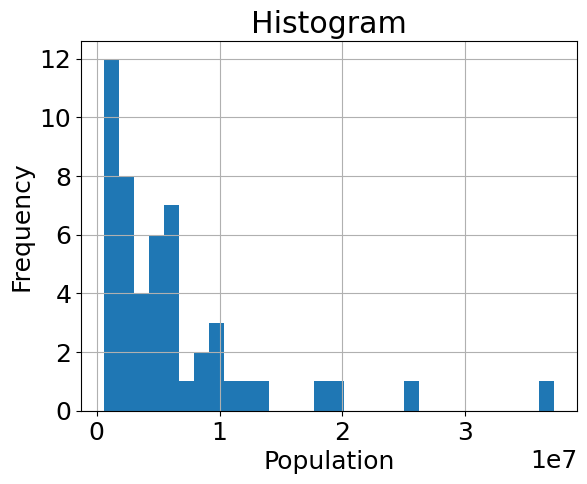

In [9]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
#istogramma
state["Population"].hist(bins=30)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

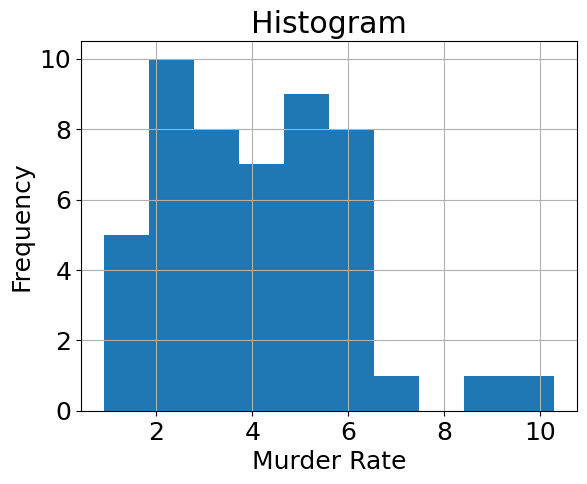

In [10]:
# usiamo caratteri leggibili!
plt.rcParams.update({'font.size': 18})
#istogramma
state["Murder.Rate"].hist(bins=10)
plt.xlabel('Murder Rate')
plt.ylabel('Frequency')
plt.title('Histogram')

Text(0, 0.5, 'Murder Rate')

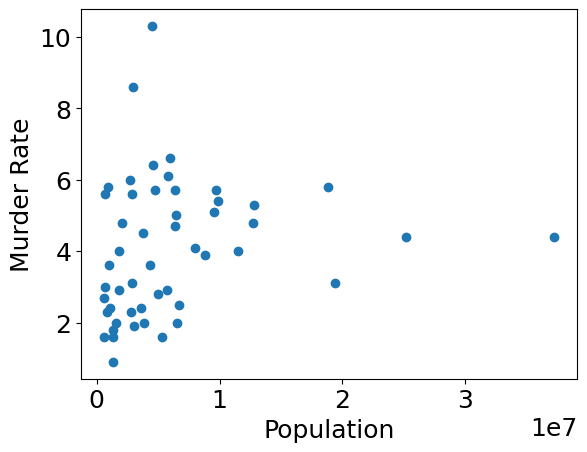

In [11]:
# con lo scatter plot si può vedere se c'è una correlazione.
# Si vede solo ad occhio
x=state["Population"]
y=state["Murder.Rate"]
plt.scatter(x,y)
plt.xlabel('Population')
plt.ylabel('Murder Rate')

<Axes: xlabel='Population', ylabel='Murder.Rate'>

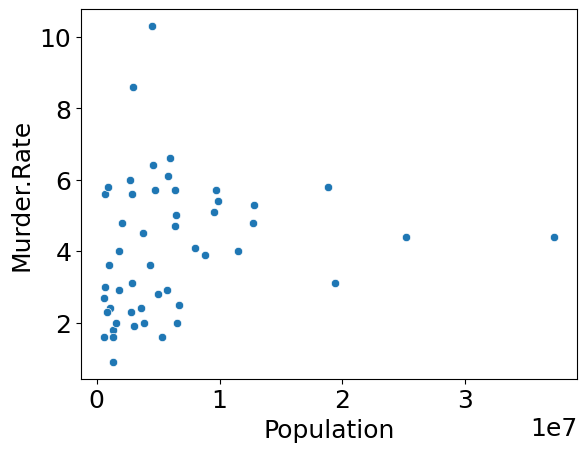

In [12]:
#stessa cosa con seaborn
sns.scatterplot(data=state, x="Population", y="Murder.Rate")

In [13]:
# classifichiamo i dati a seconda della popolazione
state["Population High"]=(state["Population"]>1e7)

<Axes: xlabel='Population High', ylabel='Murder.Rate'>

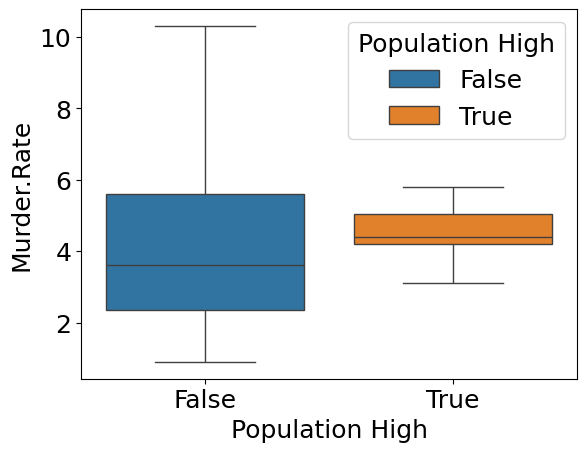

In [14]:
# Plot categorici
sns.boxplot(data=state, x="Population High", y="Murder.Rate", hue="Population High")

In [15]:
# Definiamo una nuova colonna 
state.loc[state["Population High"],"Population Level"]="High"
state.loc[~state["Population High"],"Population Level"]="Low"

<Axes: xlabel='Population Level', ylabel='Murder.Rate'>

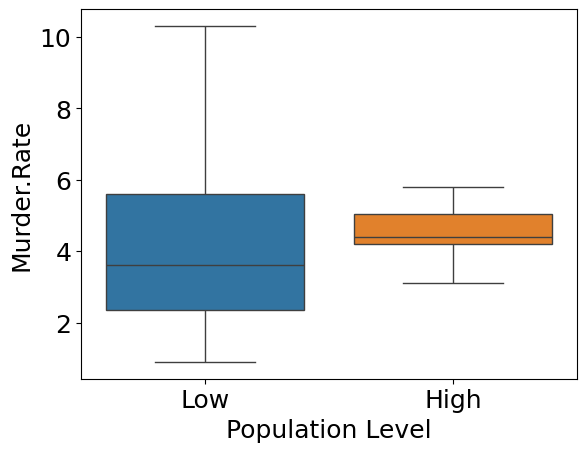

In [16]:
# Plot categorico
sns.boxplot(data=state, x="Population Level", y="Murder.Rate", hue="Population Level" )

<Axes: xlabel='Population Level', ylabel='Murder.Rate'>

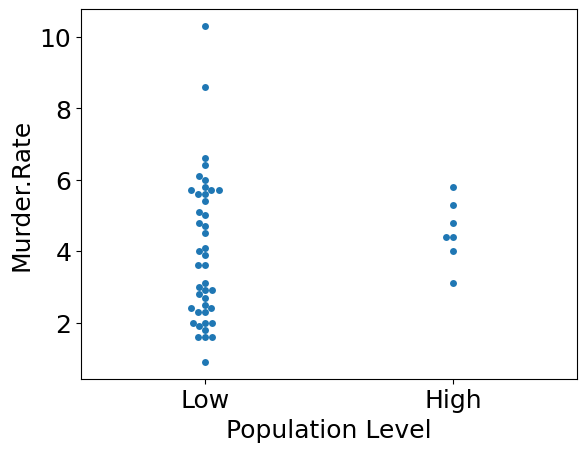

In [17]:
# Plot categorico (swarmplot)
sns.swarmplot(data=state, x="Population Level", y="Murder.Rate" )

<Axes: xlabel='Population', ylabel='Murder.Rate'>

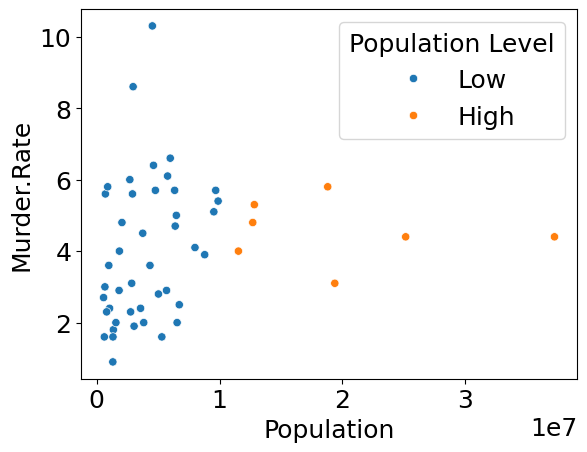

In [18]:
#Coloriamo a seconda del valore di una variabile
sns.scatterplot(data=state, x="Population", y="Murder.Rate", hue="Population Level")

### Esempio: dividere i dati 

Studiare i dati solo per le città poco popolate.

In [19]:
state_low_population = state[state["Population Level"] == "Low"].copy().reset_index(drop=True)
state_low_population

,State,Population,Murder.Rate,Abbreviation,Population High,Population Level
0,Alabama,4779736,5.7,AL,False,Low
1,Alaska,710231,5.6,AK,False,Low
2,Arizona,6392017,4.7,AZ,False,Low
3,Arkansas,2915918,5.6,AR,False,Low
4,Colorado,5029196,2.8,CO,False,Low
5,Connecticut,3574097,2.4,CT,False,Low
6,Delaware,897934,5.8,DE,False,Low
7,Georgia,9687653,5.7,GA,False,Low
8,Hawaii,1360301,1.8,HI,False,Low
9,Idaho,1567582,2.0,ID,False,Low


### Esempio: traffico aereo

In questo esempio utilizziamo un file che riporta i ritardi del traffico aereo di una serie di compagnie aeree. La prima colonna rappresenta i ritardi dovuti alla compagnia aerea, la seconda i ritardi dovuti alla torre di controllo e l'ultima i ritardi dovuti al tempo.

In [20]:
# leggiamo i dati 
airlines = pd.read_csv("data/airline_stats.csv")

In [21]:
# troviamo la lista di compagnie aeree nel dataframe
airlines["airline"].unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

In [22]:
#guardiamo il file
airlines

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


**Statistica**

Calcoliamo la media e deviazione standard dei ritardi per compagnia. Abbiamo tre tipologie di ritardo: carrier_delay (dovuto alla compagnia) atc_delay (dov uto all'aeroporto) weather_delay (dovuto al meteo).

Per questo raggrupiamo usando groupby()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html



In [23]:
medie=airlines.groupby("airline").mean()
dev_standard=airlines.groupby("airline").std()

In [24]:
medie

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,3.521889,5.472672,0.513497
American,9.042180,5.993529,1.122920
Delta,6.333460,4.462978,0.680765
Jet Blue,8.081843,7.345231,0.465327
Southwest,7.521997,3.147019,0.512611
United,7.398833,5.348133,0.680697


In [25]:
dev_standard

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
airline,,,
Alaska,2.483224,5.699303,1.136494
American,4.139067,4.647170,1.097811
Delta,4.695292,4.364335,1.093255
Jet Blue,3.797737,5.227372,0.764147
Southwest,3.345085,2.513162,0.649631
United,5.369283,4.992464,1.338433


In [26]:
medie.loc["Alaska"]

pct_carrier_delay    3.521889
pct_atc_delay        5.472672
pct_weather_delay    0.513497
Name: Alaska, dtype: float64

Quale è la causa principale di ritardo? Quindi ci da la media di tutto il sample ma non diviso per tutte le compagnie aeree. Per vedere quale è la causa maggiore di ritardo medio

In [27]:
airlines.mean()

/tmp/ipykernel_11003/722844852.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  airlines.mean()


pct_carrier_delay    7.041475
pct_atc_delay        5.089962
pct_weather_delay    0.684776
dtype: float64

**Plot categorici**

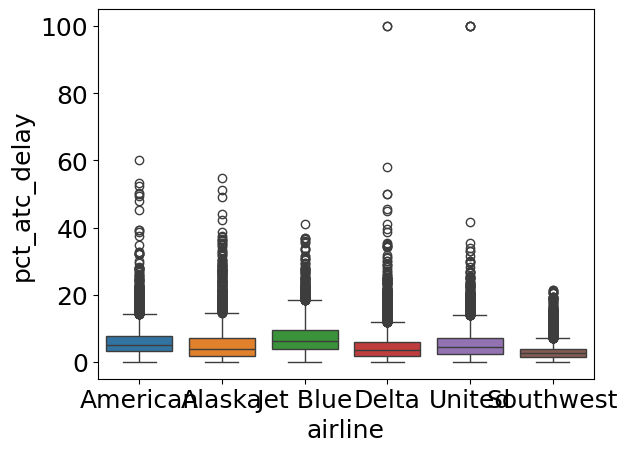

In [28]:
# Plot categorico
ax=sns.boxplot(data=airlines, x="airline", y="pct_atc_delay", hue="airline" )

Come rendere leggibili le label sull'asse x?

/tmp/ipykernel_11003/2075451083.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

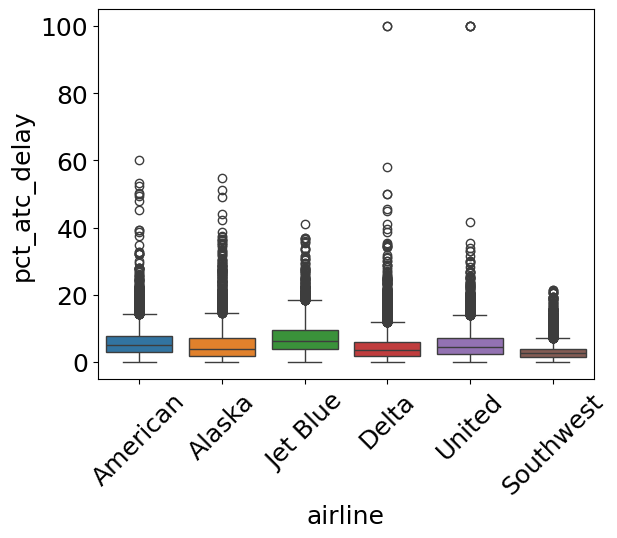

In [29]:
# Plot categorico con asse x leggibile
ax=sns.boxplot(data=airlines, x="airline", y="pct_atc_delay", hue="airline"  )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

/tmp/ipykernel_11003/379066298.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

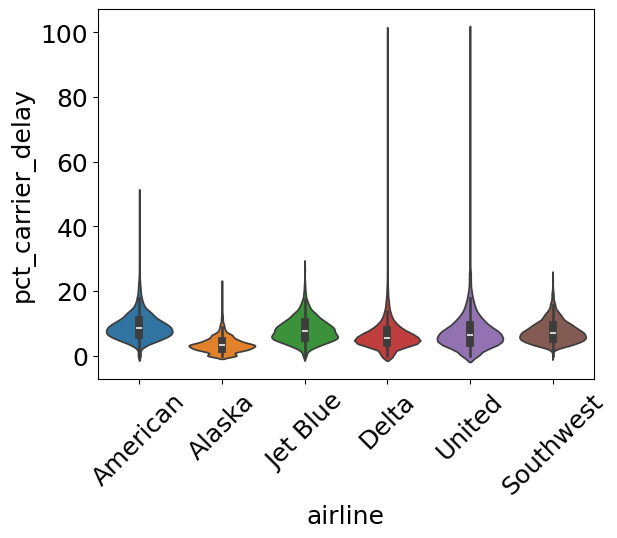

In [30]:
# Violinplot
ax=sns.violinplot(data=airlines, x="airline", y="pct_carrier_delay", hue="airline" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Se vogliam confrontare sullo stesso grafico tutti i ritardi per tutte le compagnie, possiamo riarrangiare il nostro dataframe con pd.melt
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

In [31]:
airlines_melt=pd.melt(airlines,id_vars=["airline"],value_vars=["pct_carrier_delay","pct_atc_delay","pct_weather_delay"])

In [32]:
airlines_melt

,airline,variable,value
0,American,pct_carrier_delay,8.153226
1,American,pct_carrier_delay,5.959924
2,American,pct_carrier_delay,7.157270
3,American,pct_carrier_delay,12.100000
4,American,pct_carrier_delay,7.333333
...,...,...,...
100399,Southwest,pct_weather_delay,1.651940
100400,Southwest,pct_weather_delay,0.261084
100401,Southwest,pct_weather_delay,0.343284
100402,Southwest,pct_weather_delay,0.122817


/tmp/ipykernel_11003/1891283158.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

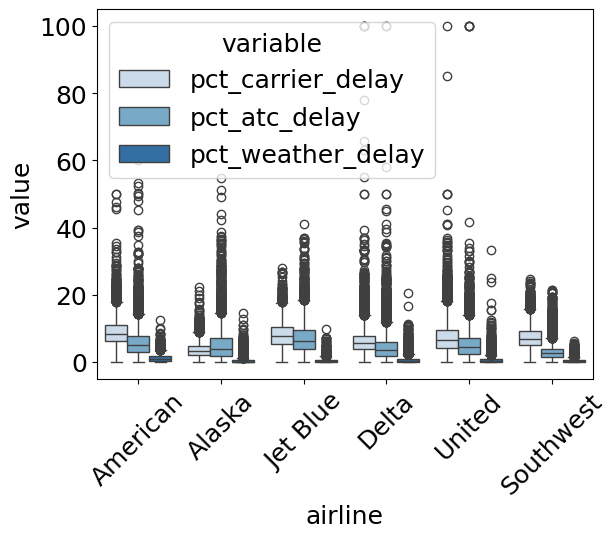

In [33]:
# Plot categorico: boxplot
ax=sns.boxplot(data=airlines_melt, x="airline", y="value", hue="variable", palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

/tmp/ipykernel_11003/2877330870.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

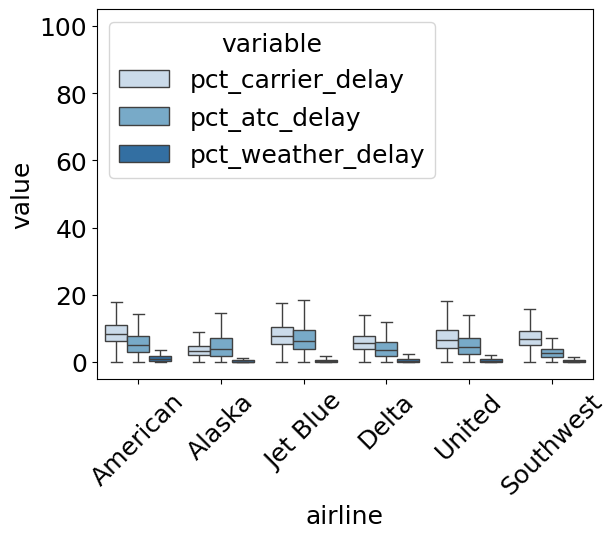

In [34]:
# Plot categorico: barplot (senza autliers)
ax=sns.boxplot(data=airlines_melt, 
               x="airline", y="value", 
               hue="variable", palette="Blues",
              fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

/tmp/ipykernel_11003/1891066592.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


[Text(0, 0, 'American'),
 Text(1, 0, 'Alaska'),
 Text(2, 0, 'Jet Blue'),
 Text(3, 0, 'Delta'),
 Text(4, 0, 'United'),
 Text(5, 0, 'Southwest')]

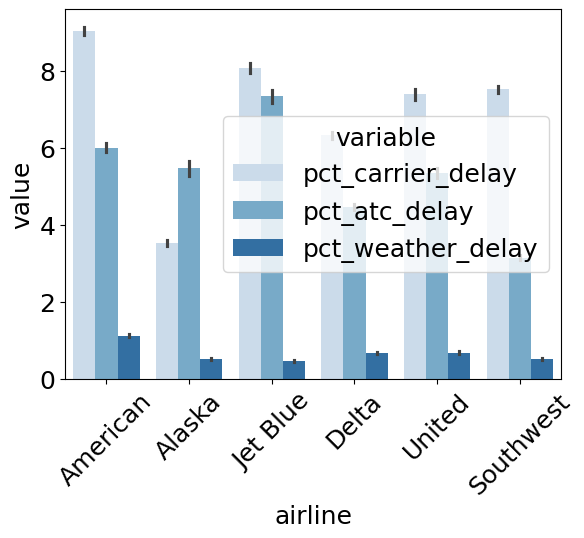

In [35]:
# Plot categorico: barplot
ax=sns.barplot(data=airlines_melt, x="airline", y="value", hue="variable", palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

### Esercizio

**Introduzione**
In questo esercizio utilizzeremo un nuovo file di dati per mettere in pratica quanto discusso negli esempi. Per prima cosa carichiamo 
il file ../data/kc_tax.csv.gz

In [36]:
kc_tax = pd.read_csv("data/kc_tax.csv.gz")

In [37]:
# apriamo il file
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [38]:
# eliminiamo i NaN con un comando comodo comodo
kc_tax=kc_tax.dropna()

In [39]:
kc_tax

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


In [40]:
#cambiamo il nome delle colonne
kc_tax.columns=["Valore catastale","Metri quadrati","CAP"]

In [41]:
kc_tax.loc["Metri quadrati"]=kc_tax["Metri quadrati"]*0.092903

/tmp/ipykernel_11003/603995099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_tax.loc["Metri quadrati"]=kc_tax["Metri quadrati"]*0.092903


In [42]:
# prendiamo un sottoinsieme del database
kc_tax0 = kc_tax.loc[(kc_tax.CAP < 98020)]

In [43]:
kc_tax0

,Valore catastale,Metri quadrati,CAP
1,206000.0,1870.0,98002.0
21,475000.0,1530.0,98007.0
22,517000.0,1910.0,98007.0
42,445000.0,1150.0,98008.0
43,445000.0,1460.0,98007.0
...,...,...,...
498198,201000.0,1390.0,98002.0
498199,185000.0,1110.0,98002.0
498235,613000.0,3050.0,98006.0
498236,849000.0,730.0,98006.0


**Svolgimento:** 
A questo punto possiamo esplorare alcune proprietà di questo database, ad esempio:

- Studiare quale sia la correlazione tra valore catastale e metri quadrati

- Studiare come varia il valore catastale a seconda del CAP

- Studiare come varia la metratura media a seconda del CAP

**Suggerimenti:**

Per visualizzare la correlazione possiamo ad esempio  
fare uno scatterplot dei dati grezzi "Metri quadri" vs "Catastale".

Visto che i dati sono molti possiamo anche raggrupparli secondo il CAP (usando groupby("CAP").mean() ) e poi plottare le medie

Proviamo ad usare sns.barplot() o sns.boxplot() 

Lavoriamo prima con il dataframe "piccolo" kc_tax0 e poi proviamo con il dataframe complete kc_tax


Text(0, 0.5, 'Valore catastale [$]')

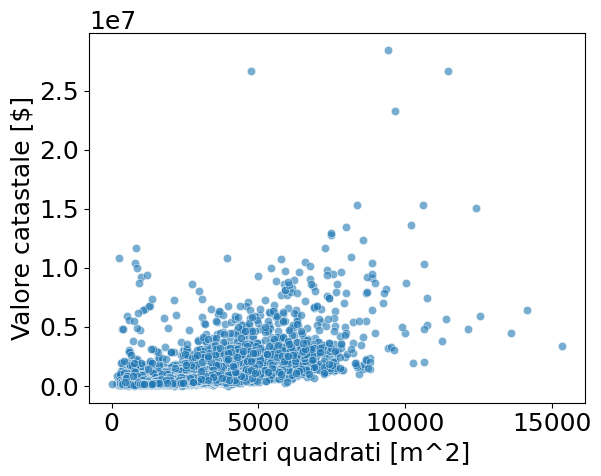

In [44]:
sns.scatterplot(x=kc_tax0["Metri quadrati"], y=kc_tax0["Valore catastale"], alpha=0.6)
plt.xlabel('Metri quadrati [m^2]')
plt.ylabel('Valore catastale [$]')

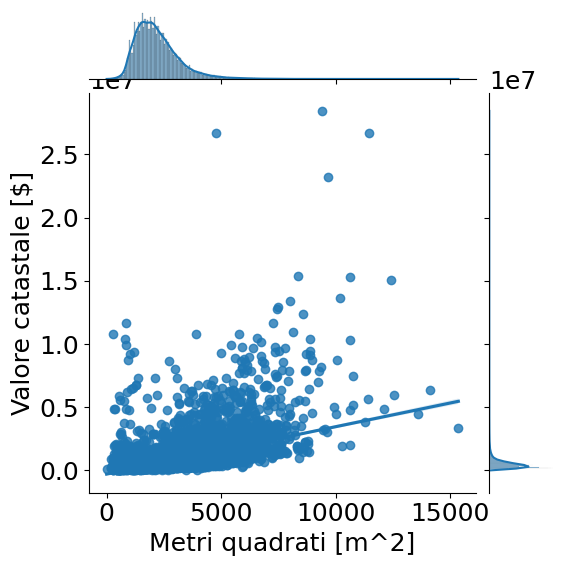

In [46]:
# scatter
ax=sns.jointplot(x=kc_tax0["Metri quadrati"], y=kc_tax0["Valore catastale"], kind="reg")
ax.set_axis_labels("Metri quadrati [m^2]","Valore catastale [$]")

In [47]:
medie=kc_tax0.groupby("CAP").mean()
dev_standard=kc_tax0.groupby("CAP").std()

In [48]:
medie

,Valore catastale,Metri quadrati
CAP,,
0.0,3.830000e+05,2409.000000
98.0,2.080000e+05,1150.000000
9800.0,1.237000e+06,4000.000000
89118.0,2.520000e+05,2260.000000
90055.0,6.008000e+05,3620.000000
90108.0,3.210000e+05,1520.000000
90855.0,2.720000e+05,1714.000000
95055.0,2.720000e+05,1714.000000
95059.0,1.600000e+05,2970.000000


In [ ]:
# scatter
ax=sns.scatterplot(x=kc_tax0["CAP"], y=kc_tax0["Valore catastale"])
ax.set_axis_labels("CAP","Valore catastale [$]")

### La matrice di covarianza

In questo esempio costruiamo la matrice di covarianza a partire da un set di dati finanziari (il prezzo delle azioni SP500).

In [ ]:
# importiamo i dati
sp500_sym = pd.read_csv("../data/sp500_sectors.csv") # simboli
sp500_px = pd.read_csv("../data/sp500_data.csv.gz", index_col=0) # dati di borsa

In [ ]:
# Table 1-7
# Consideriamo il settore telecomunicazioni
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filtriamo i dati considerando il periodo 07/2012-06/2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom.corr()
print(telecom)

In [ ]:
# Focalizziamoci su di un sottoinsieme dei dati 
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

In [ ]:
# calcoliamo la matrice di covarianza
etfs.corr()

In [ ]:
# Mostriamo la matrice di covarianza come heatmap
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap="coolwarm", #colormap divergente
                 ax=ax)

plt.tight_layout()
plt.show()